In [1]:
import json

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import seaborn as sb

plt.style.use("science")

from copia.hill import empirical_hill
from copia.utils import evenness

In [2]:
q_min, q_max, step = 0, 3, 0.1
q = np.arange(q_min, q_max + step, step)

## Network topologies:

Watts-Strogatz graph (sensu Lipo et al.):

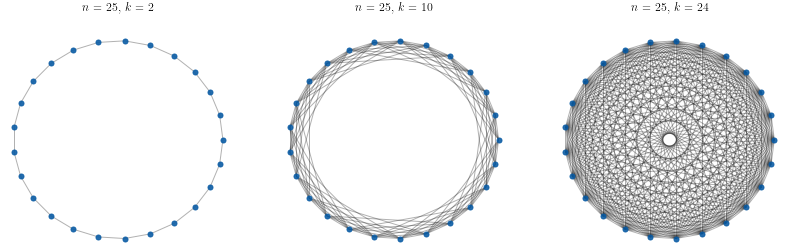

In [3]:
%matplotlib inline

degrees = 2, 10, 24
n_agents = 25

fig, axes = plt.subplots(ncols=len(degrees), figsize=(14, 4))
axes = axes.flatten()

for i, degree in enumerate(degrees):
    G = nx.watts_strogatz_graph(n=25, k=degree, p=0.0, seed=n_agents)
    pos = nx.kamada_kawai_layout(G)

    nx.draw_networkx_nodes(G, pos, node_size=25, alpha=0.9, node_color="C0", ax=axes[i])
    nx.draw_networkx_edges(G, pos, alpha=0.3, ax=axes[i])
    axes[i].set_title(f'$n$ = {n_agents}, $k$ = {degree}', pad=20)
    axes[i].axis('off')

In [4]:
data = np.load("20211030085302.npz")
params, populations = data["params"], data["populations"]

In [5]:
{size: i for i, size in enumerate(np.unique(params[:, 0]))}

{1000.0: 0, 5000.0: 1, 10000.0: 2}

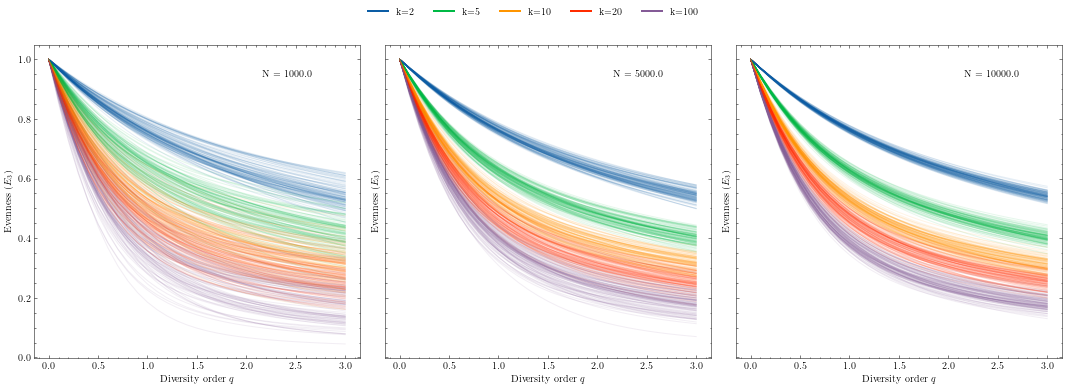

In [7]:
from matplotlib.lines import Line2D

evenness_data, evenness_cv_data = [], []

q_values = np.arange(0, 3.1, 0.1)

pop_size_index = {size: i for i, size in enumerate(np.unique(params[:, 0]))}
degree_index = {k: i for i, k in enumerate(np.unique(params[:, 1]))}
    
fig, axes = plt.subplots(ncols=len(pop_size_index), figsize=(15, 5), sharey=True)

for j, population in enumerate(populations):
    _, counts = np.unique(population[population > 0], return_counts=True)
    emp = empirical_hill(counts, q_values)
    even = (emp - 1) / (emp[0] - 1)
    ax = axes[pop_size_index[params[j, 0]]]
    ax.plot(
        q_values,
        even,
        alpha=0.1,
        color=f"C{degree_index[params[j, 1]]}" 
    )

for size, i in pop_size_index.items():
    axes[i].set(xlabel="Diversity order $q$", ylabel="Evenness ($E_3$)")
    axes[i].text(0.7, 0.9, f"N = {size}", transform=axes[i].transAxes)
    axes[i].tick_params(axis='y', which='minor', left=True)

labels, indices = zip(*degree_index.items())
custom_lines = [Line2D([0], [0], color=f"C{i}", lw=2) for i in indices]
fig.legend(custom_lines, [f'k={int(k)}' for k in labels], 
          loc="upper center", ncol=len(set(labels)), bbox_to_anchor=(0.5, 1.1), frameon=False)

plt.tight_layout()
plt.savefig("../outputs/network-evenness.pdf", bbox_inches='tight')

In [8]:
import pandas as pd


q_values = np.arange(0, 3.25, 0.25)

E = np.zeros((populations.shape[0], len(q_values)))
for i, population in enumerate(populations):
    _, counts = np.unique(population[population > 0], return_counts=True)
    emp = empirical_hill(counts, q_values)
    evenness = (emp - 1) / (emp[0] - 1)
    E[i] = evenness

df = pd.DataFrame(E)
df = df.set_index(pd.MultiIndex.from_arrays(params[:, [0, 1]].T, names=["N", "k"]))
df

0         1         2         3         4         5   \
N       k                                                              
1000.0  2.0    1.0  0.920422  0.853274  0.796682  0.748728  0.707690   
        5.0    1.0  0.880640  0.788452  0.716990  0.660773  0.615636   
        10.0   1.0  0.762183  0.596373  0.485485  0.411431  0.360501   
        20.0   1.0  0.821030  0.686887  0.586025  0.509273  0.450050   
        100.0  1.0  0.779282  0.615103  0.496638  0.411868  0.350601   
...            ...       ...       ...       ...       ...       ...   
10000.0 2.0    1.0  0.927181  0.864521  0.810636  0.764119  0.723682   
        5.0    1.0  0.869197  0.767402  0.688322  0.626298  0.576867   
        10.0   1.0  0.830596  0.702808  0.607571  0.536273  0.482066   
        20.0   1.0  0.803987  0.664104  0.565990  0.496548  0.446106   
        100.0  1.0  0.738429  0.553404  0.428072  0.344082  0.286915   

                     6         7         8         9         10        11  \
N       k                                                                   
1000.0  2.0    0.672142  0.640964  0.613298  0.588502  0.566094  0.545711   
        5.0    0.578593  0.547559  0.521083  0.498144  0.478011  0.460152   
        10.0   0.323895  0.296358  0.274795  0.257355  0.242892  0.230667   
        20.0   0.403779  0.367239  0.338108  0.314668  0.295631  0.280022   
        100.0  0.305399  0.271237  0.244810  0.223940  0.207162  0.193466   
...                 ...       ...       ...       ...       ...       ...   
10000.0 2.0    0.688221  0.656830  0.628783  0.603504  0.580543  0.559545   
        5.0    0.536748  0.503604  0.475778  0.452086  0.431667  0.413884   
        10.0   0.440004  0.406666  0.379714  0.357538  0.339008  0.323317   
        20.0   0.408245  0.378882  0.355424  0.336200  0.320097  0.306354   
        100.0  0.246848  0.217829  0.196149  0.179501  0.166408  0.155896   

                     12  
N       k                
1000.0  2.0    0.527078  
        5.0    0.444172  
        10.0   0.220180  
        20.0   0.267101  
        100.0  0.182137  
...                 ...  
10000.0 2.0    0.540230  
        5.0    0.398252  
        10.0   0.309874  
        20.0   0.294436  
        100.0  0.147302  

[1500 rows x 13 columns]

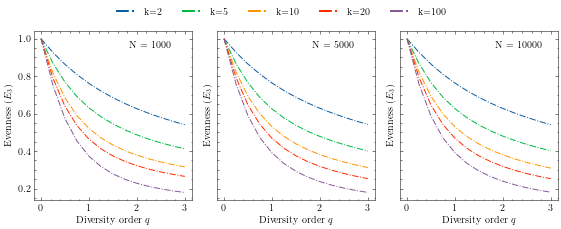

In [9]:
d = df.groupby(["N", "k"]).mean()
index, values = d.index, d.values

fig, axes = plt.subplots(ncols=len(pop_size_index), figsize=(8, 3), sharey=True)

for i, pop in enumerate(values):
    ax = axes[pop_size_index[index[i][0]]]
    ax.plot(
        q_values,
        pop,
        "-.",
        color=f"C{degree_index[index[i][1]]}" 
    )

for size, i in pop_size_index.items():
    axes[i].set(xlabel="Diversity order $q$", ylabel="Evenness ($E_3$)")
    axes[i].text(0.6, 0.9, f"N = {int(size)}", transform=axes[i].transAxes)
    axes[i].tick_params(axis='y', which='minor', left=True)

labels, indices = zip(*degree_index.items())
custom_lines = [Line2D([0], [0], ls="-.", color=f"C{i}", lw=2) for i in indices]
fig.legend(custom_lines, [f'k={int(k)}' for k in labels], 
          loc="upper center", ncol=len(set(labels)), bbox_to_anchor=(0.5, 1.1), frameon=False)

plt.tight_layout()
plt.savefig("../outputs/network-evenness-mean.pdf", bbox_inches='tight')